https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [1]:
from keras.applications.vgg16 import VGG16

In [2]:
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


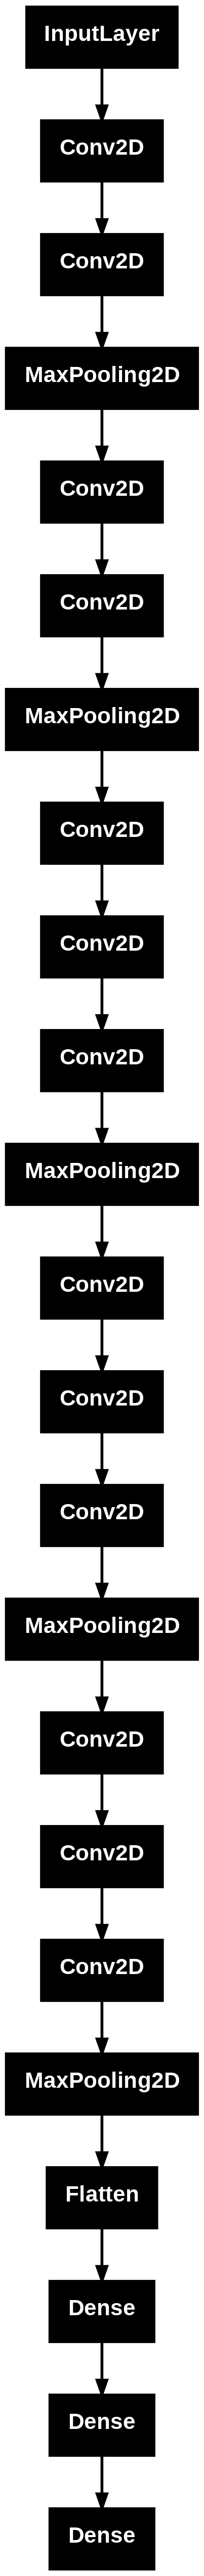

In [3]:
from keras.utils import plot_model
plot_model(model)

In [4]:
for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  filters, biases = model.layers[i].get_weights()
  print("Layer Number", i, model.layers[i].name, filters.shape)

Layer Number 1 block1_conv1 (3, 3, 3, 64)
Layer Number 2 block1_conv2 (3, 3, 64, 64)
Layer Number 4 block2_conv1 (3, 3, 64, 128)
Layer Number 5 block2_conv2 (3, 3, 128, 128)
Layer Number 7 block3_conv1 (3, 3, 128, 256)
Layer Number 8 block3_conv2 (3, 3, 256, 256)
Layer Number 9 block3_conv3 (3, 3, 256, 256)
Layer Number 11 block4_conv1 (3, 3, 256, 512)
Layer Number 12 block4_conv2 (3, 3, 512, 512)
Layer Number 13 block4_conv3 (3, 3, 512, 512)
Layer Number 15 block5_conv1 (3, 3, 512, 512)
Layer Number 16 block5_conv2 (3, 3, 512, 512)
Layer Number 17 block5_conv3 (3, 3, 512, 512)


In [5]:
# Retrive weights from the second hidden Layer
filter, bias = model.layers[1].get_weights()

In [6]:
# Normalize filter value to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

In [7]:
import matplotlib.pyplot as plt

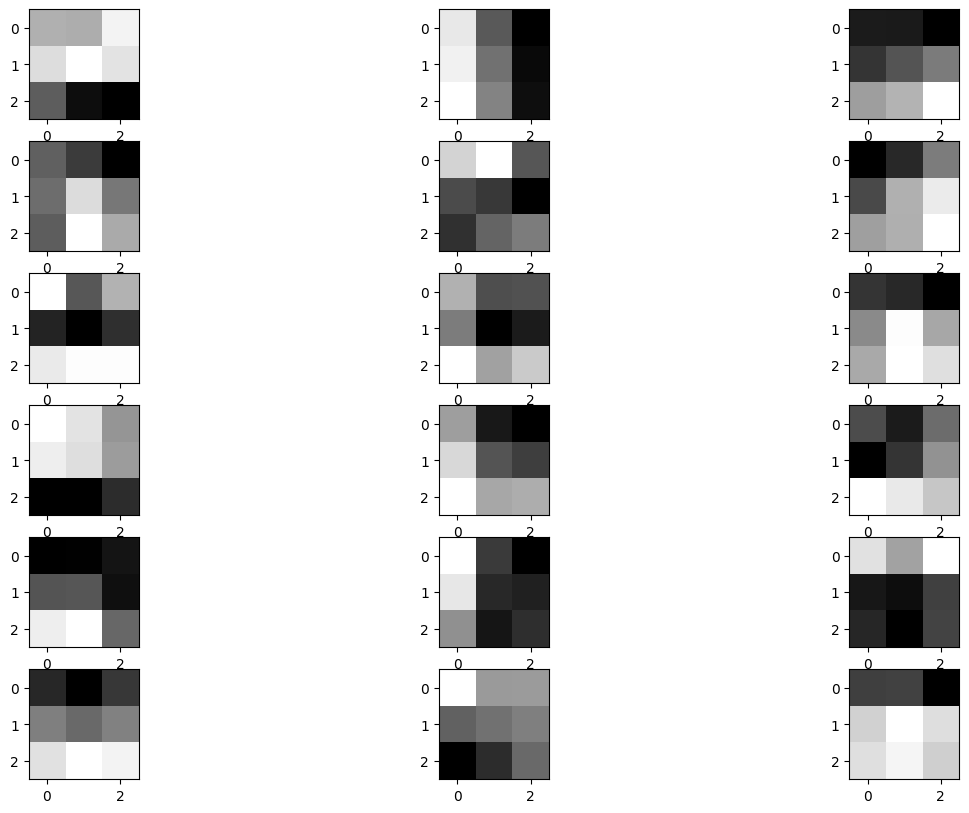

In [8]:
n_filters = 6

ix = 1
fig = plt.figure(figsize = (15, 10))
for i in range(n_filters):
  f = filters[:,:,:,i]
  for j in range(3):
    plt.subplot(n_filters, 3, ix)
    plt.imshow(f[:,:,j], cmap = "gray")
    ix += 1
plt.show()

In [9]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot

# load the model
model = VGG16()

# summarize feature map shapes
for i in range(len(model.layers)):
  layer = model.layers[i]
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue
  # summarize output shape
  print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [10]:
from keras.layers import Lambda, concatenate
from keras import Model
import tensorflow as tf

In [11]:
# redefine model to output right after the first hidden layer
model = Model(inputs = model.inputs, outputs = model.layers[1].output)

In [12]:
# input shape to the model is 224 x 224, so resize input image to this shape
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import numpy as np

In [13]:
# input shape to the model is 224 x 224, so resize input image to this shape
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/lion_img.jpg', target_size = (224, 224))   #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis = 0)
# Generate feature output by predicting on the input image
feature_output = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


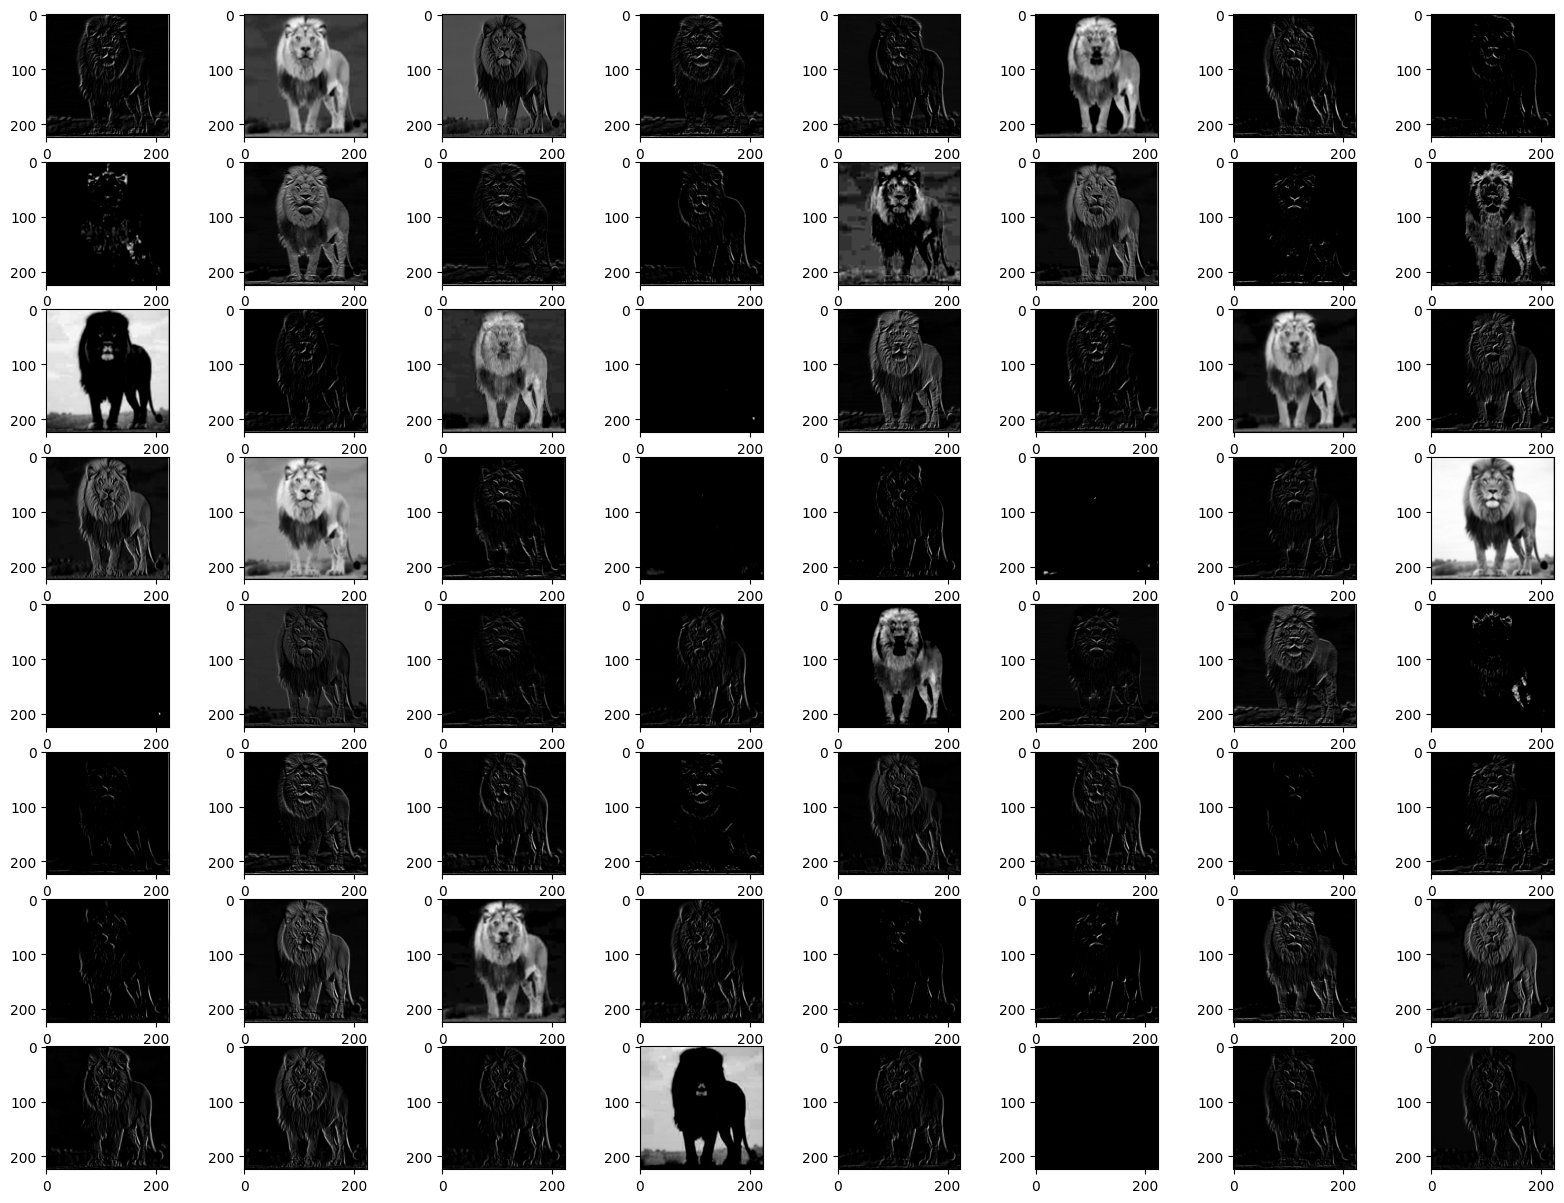

In [14]:
#calculating features_map

fig = pyplot.figure(figsize = (20, 15))
for i in range(1, feature_output.shape[3]+1):

  pyplot.subplot(8, 8, i)
  pyplot.imshow(feature_output[0,:,:,i-1], cmap = "gray")

pyplot.show()